<a href="https://colab.research.google.com/github/techonair/Machine-Learing-A-Z/blob/main/Regression/Polynomial%20Regression/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression**

We have a case study, we are hiring a person, the person was previously a Regional Manager for quite a long time, he says he had a salary of 160K in his previous company, we need to check if that is true or bluffing. We have the dataset, let's do it.

# Importing Libraries

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# Uploading the dataset

In [1]:
from google.colab import files
files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


{'Position_Salaries.csv': b'Position,Level,Salary\r\nBusiness Analyst,1,45000\r\nJunior Consultant,2,50000\r\nSenior Consultant,3,60000\r\nManager,4,80000\r\nCountry Manager,5,110000\r\nRegion Manager,6,150000\r\nPartner,7,200000\r\nSenior Partner,8,300000\r\nC-level,9,500000\r\nCEO,10,1000000'}

# Spliting The Dataset in X & Y

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[ : , 1:-1].values
Y = dataset.iloc[ : , -1].values

# Training The Dataset With Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Training The Dataset With Polynomial Regression

y = a + bx + cx^2 + dx^3 + ....

if I take [x, x^2, x^3, ...] as a matrix then it will be in the form of linear regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# degree = 2 -> y = a + bx + cx^2
# for first attempt tried with degree 2, curve wasn't fitting very well, tried with degree 3 & 4
poly_regressor = PolynomialFeatures(degree= 4)
X_poly = poly_regressor.fit_transform(X)

lin_regressor_2 = LinearRegression()
lin_regressor_2.fit(X_poly, Y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Visualizing Linear Regression Prediction

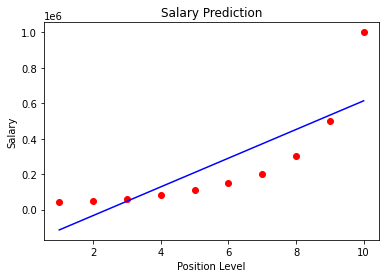

In [10]:
plt.scatter(X, Y, color= 'red')
plt.plot(X, lin_regressor.predict(X), color = 'blue')
plt.title('Salary Prediction')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Visualizing Polynomial Regression Prediction

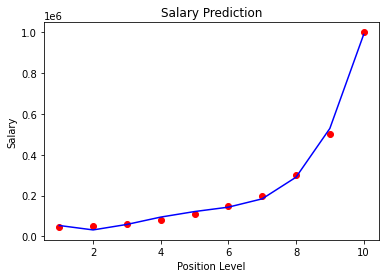

In [16]:
plt.scatter(X, Y, color= 'red')
plt.plot(X, lin_regressor_2.predict(X_poly), color = 'blue')
plt.title('Salary Prediction')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Model is overfitting

# Visualizing Polynomial Regression Prediction (for higher resolution and smoother curve)


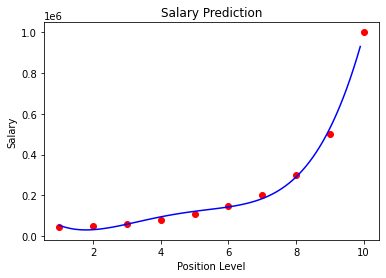

In [21]:
x_grid = np.arange(min(X), max(X), 0.1)
# 0.1 steps instead of 1 as in the above graph
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X, Y, color= 'red')
plt.plot(x_grid, lin_regressor_2.predict(poly_regressor.fit_transform(x_grid)), color = 'blue')
plt.title('Salary Prediction')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Predicting a New Result with Linear Regression

In [24]:
lin_regressor.predict([[6.5]])

array([330378.78787879])

# Predicting a New Result with Polynomial Regression

In [25]:
lin_regressor_2.predict(poly_regressor.fit_transform([[6.5]]))

array([158862.45265155])